In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# TASK 1

#  Predictive Modeling

In [2]:
# Build a regression model to predict the aggregate rating of a restaurant based on available features.

In [3]:
df = pd.read_csv(r"E:\Internship\datasettask.csv")

In [4]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [7]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
output=le.fit_transform(df['Has Table booking'])
df['Has Table booking']=output
output=le.fit_transform(df['Restaurant Name'])
df['Restaurant Name']=output
output=le.fit_transform(df['Has Online delivery'])
df['Has Online delivery']=output
output=le.fit_transform(df['Is delivering now'])
df['Is delivering now']=output
output=le.fit_transform(df['Switch to order menu'])	
df['Switch to order menu']=output
output=le.fit_transform(df['City'])	
df['City']=output
output=le.fit_transform(df['Address'])	
df['Address']=output
output=le.fit_transform(df['Locality Verbose'])	
df['Locality Verbose']=output
output=le.fit_transform(df['Cuisines'])	
df['Cuisines']=output
output=le.fit_transform(df['Currency'])	
df['Currency']=output
output=le.fit_transform(df['Locality'])	
df['Locality']=output
output=le.fit_transform(df['Rating color'])	
df['Rating color']=output
output=le.fit_transform(df['Rating text'])	
df['Rating text']=output

In [8]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,3748,162,73,8685,171,172,121.027535,14.565443,920,...,0,1,0,0,0,3,4.8,0,1,314
1,6304287,3172,162,73,6055,593,601,121.014101,14.553708,1111,...,0,1,0,0,0,3,4.5,0,1,591
2,6300002,2896,162,75,4684,308,314,121.056831,14.581404,1671,...,0,1,0,0,0,4,4.4,1,5,270
3,6318506,4707,162,75,8690,862,875,121.056475,14.585318,1126,...,0,0,0,0,0,4,4.9,0,1,365
4,6314302,5523,162,75,8689,862,875,121.057508,14.584450,1122,...,0,1,0,0,0,4,4.8,0,1,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,4443,208,140,5926,517,523,28.977392,41.022793,1813,...,11,0,0,0,0,3,4.1,1,5,788
9547,5908749,1310,208,140,5962,552,558,29.041297,41.009847,1824,...,11,0,0,0,0,3,4.2,1,5,1034
9548,5915807,3068,208,140,5966,554,561,29.034640,41.055817,1110,...,11,0,0,0,0,4,3.7,5,2,661
9549,5916112,512,208,140,5967,554,561,29.036019,41.057979,1657,...,11,0,0,0,0,4,4.0,1,5,901


In [9]:
df.dtypes

Restaurant ID             int64
Restaurant Name           int64
Country Code              int64
City                      int64
Address                   int64
Locality                  int64
Locality Verbose          int64
Longitude               float64
Latitude                float64
Cuisines                  int64
Average Cost for two      int64
Currency                  int64
Has Table booking         int64
Has Online delivery       int64
Is delivering now         int64
Switch to order menu      int64
Price range               int64
Aggregate rating        float64
Rating color              int64
Rating text               int64
Votes                     int64
dtype: object

In [10]:
X = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']


In [ ]:
# Split the dataset into training and testing sets and evaluate the model's performance using appropriate metrics.
# Experiment with different algorithms (e.g., linear regression, decision trees, random forest) and compare their performance.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)


,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [14]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 0.9228200091111448
MSE: 1.2188279089052747
RMSE: 1.1040053935127647
R² Score: 0.46451250177630987


In [20]:
y_pred_lr = lr_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

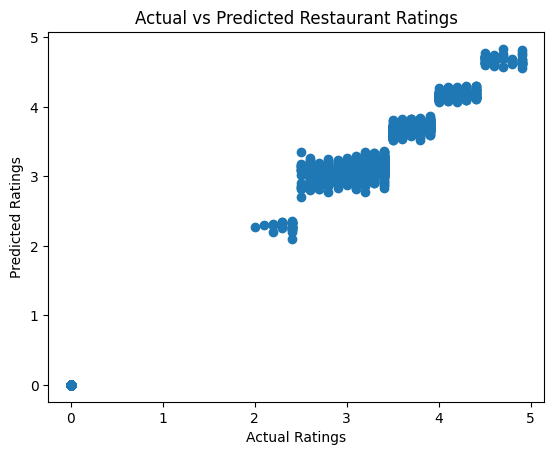

In [19]:
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Restaurant Ratings")
plt.show()

# TASK 2

# Customer Preference Analysis

In [ ]:
# Analyze the relationship between the type of cuisine and the restaurant's rating.

In [23]:
df = pd.read_csv(r"E:\Internship\datasettask.csv")

In [26]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [24]:
# Group by Cuisines and calculate the mean Aggregate rating
cuisine_rating = df.groupby('Cuisines')['Aggregate rating'].mean().reset_index()

# Sort cuisines by average rating (descending)
cuisine_rating = cuisine_rating.sort_values(by='Aggregate rating', ascending=False)

print(cuisine_rating.head(10))

                             Cuisines  Aggregate rating
302           Burger, Bar Food, Steak               4.9
33            American, Burger, Grill               4.9
37       American, Caribbean, Seafood               4.9
41           American, Coffee and Tea               4.9
1214  Mexican, American, Healthy Food               4.9
1034     Italian, Bakery, Continental               4.9
169          BBQ, Breakfast, Southern               4.9
808                  European, German               4.9
949                 Hawaiian, Seafood               4.9
1779                Sunda, Indonesian               4.9


In [ ]:
# Identify the most popular cuisines among customers based on the number of votes.

In [27]:
popular_cuisines = df.groupby('Cuisines')['Votes'].sum().reset_index()
popular_cuisines = popular_cuisines.sort_values(by='Votes', ascending=False)

print(popular_cuisines.head(10))


                            Cuisines  Votes
1514           North Indian, Mughlai  53747
1306                    North Indian  46241
1329           North Indian, Chinese  42012
331                             Cafe  30657
497                          Chinese  21925
1520  North Indian, Mughlai, Chinese  20115
828                        Fast Food  17852
1699                    South Indian  16433
1288           Mughlai, North Indian  15275
1031                         Italian  14799


In [ ]:
# Determine if there are any specific cuisines that tend to receive higher ratings.

In [32]:
merged = pd.merge(popular_cuisines, cuisine_rating, on='Cuisines')
merged = merged.sort_values(by='Votes', ascending=False)

print(merged.head(10))


                         Cuisines  Votes  Aggregate rating
0           North Indian, Mughlai  53747          2.888623
1                    North Indian  46241          1.672329
2           North Indian, Chinese  42012          2.421722
3                            Cafe  30657          2.890970
4                         Chinese  21925          2.042090
5  North Indian, Mughlai, Chinese  20115          2.568528
6                       Fast Food  17852          2.118362
7                    South Indian  16433          2.370536
8           Mughlai, North Indian  15275          2.091667
9                         Italian  14799          3.657407


# TASK 3

# Data Visualization

In [ ]:
#  Create visualizations to represent the distribution of ratings using different charts (histogram, bar plot, etc.).

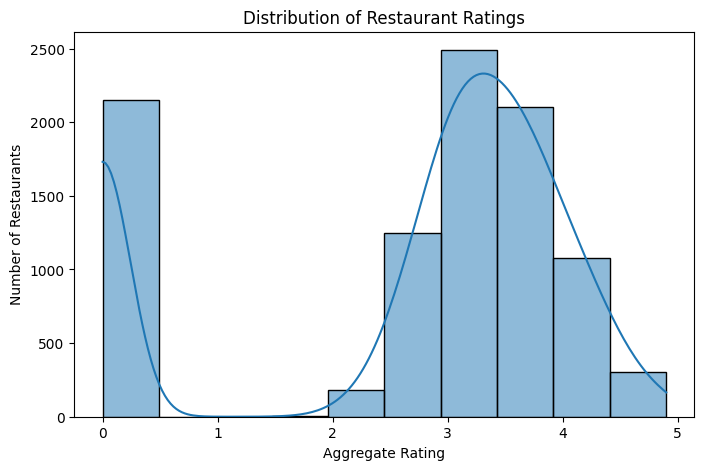

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Aggregate rating'], bins=10, kde=True)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Restaurants')
plt.show()

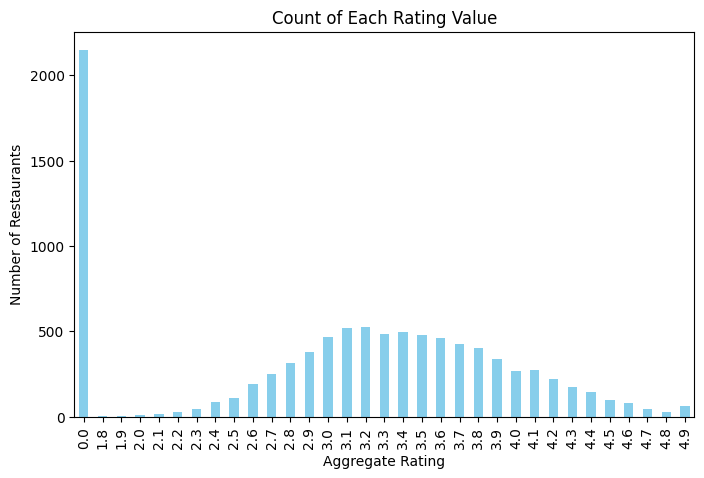

In [37]:
plt.figure(figsize=(8,5))
df['Aggregate rating'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Count of Each Rating Value')
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Restaurants')
plt.show()

In [ ]:
# Compare the average ratings of different cuisines or cities using appropriate visualizations.

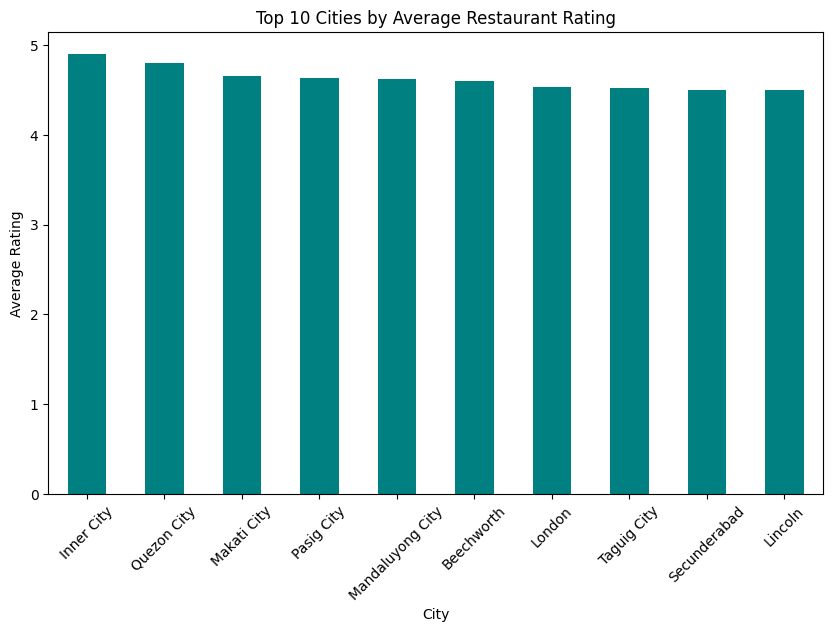

In [41]:
city_ratings = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
city_ratings.plot(kind='bar', color='teal')
plt.title('Top 10 Cities by Average Restaurant Rating')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Visualize the relationship between various features and the target variable to gain insights.

C:\Users\Jai Ambey\AppData\Local\Temp\ipykernel_11340\2443345345.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Price range', y='Aggregate rating', palette='viridis')


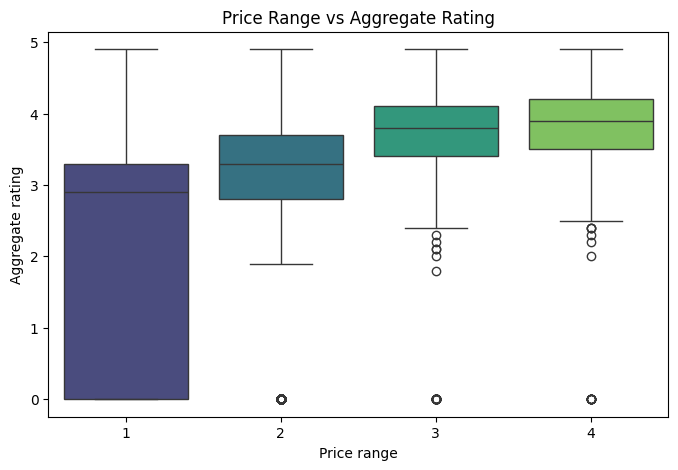

In [44]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Price range', y='Aggregate rating', palette='viridis')
plt.title('Price Range vs Aggregate Rating')
plt.show()


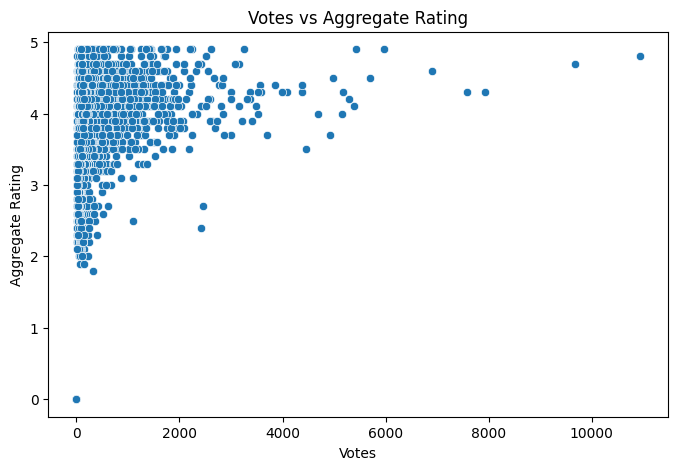

In [46]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Votes', y='Aggregate rating')
plt.title('Votes vs Aggregate Rating')
plt.xlabel('Votes')
plt.ylabel('Aggregate Rating')
plt.show()
